# Synthetic Data - Basic Example with CTGAN
<a class="anchor" id="top"></a>

[CTGAN Repository](https://github.com/sdv-dev/CTGAN)


## Table of Contents
* [Top of Notebook](#top)
* [Section 1 - Imports](#imports)
* [Section 2 - Get Data](#getdata)
* [Section 3 - Prepare Data](#preparedata)
* [Section 4 - CTGAN](#ctgan)
* [Section 5 - Inspect and Validate](#inspect)

## Section 1 - Imports <a class="anchor" id="imports"></a>
[Back to Top](#top)

In [1]:
#basic data wrangling
import pandas as pd

#synthetic data generator
from ctgan import CTGANSynthesizer

#evaluator tool
from table_evaluator import load_data, TableEvaluator


#to get the iris dataset
from sklearn.datasets import load_boston


## Section 2 - Get Data <a class="anchor" id="getdata"></a>
[Back to Top](#top)

In [2]:
boston_dataset = load_boston()


## Section 3 - Prepare Data <a class="anchor" id="preparedata"></a>
[Back to Top](#top)

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# add target 
boston['MEDV'] = boston_dataset.target


## Section 4 - CTGAN <a class="anchor" id="ctgan"></a>
[Back to Top](#top)

In [5]:
list(boston.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [6]:
# Names of the columns that are discrete
discrete_columns =['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']



In [7]:
ctgan = CTGANSynthesizer(epochs=10)
ctgan.fit(boston, discrete_columns)



C:\Users\susan\anaconda3\lib\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [8]:
# Synthetic copy
samples = ctgan.sample(1000)

In [9]:
samples

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,11.57790,18.0,4.95,0.0,0.575,4.970,88.6,2.1675,24.0,666.0,18.5,392.43,17.19,30.1
1,0.13262,22.0,1.38,0.0,0.472,6.816,85.9,7.2255,24.0,281.0,18.4,386.75,19.52,18.4
2,16.81180,75.0,1.38,0.0,0.585,8.069,73.4,7.3073,7.0,244.0,21.0,393.25,10.87,28.1
3,5.70818,85.0,1.21,0.0,0.718,7.691,90.0,2.4259,8.0,245.0,16.4,350.45,4.82,29.8
4,0.53412,55.0,8.14,0.0,0.385,5.957,18.8,2.6775,7.0,307.0,20.1,370.22,2.87,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25.94060,35.0,5.64,0.0,0.410,5.597,52.3,1.7659,24.0,352.0,21.0,393.24,12.34,33.4
996,24.80170,90.0,4.05,1.0,0.740,6.316,99.1,2.0720,24.0,285.0,14.8,396.14,9.55,19.0
997,0.21038,95.0,4.39,0.0,0.550,6.421,21.4,3.4211,4.0,307.0,16.8,375.87,5.10,20.3
998,0.84054,30.0,7.38,0.0,0.524,5.961,96.8,2.8561,24.0,666.0,21.2,388.45,9.88,17.7


In [10]:
samples=samples.drop_duplicates()

## Section 4 - Inspect and Validate <a class="anchor" id="inspect"></a>
[Back to Top](#top)

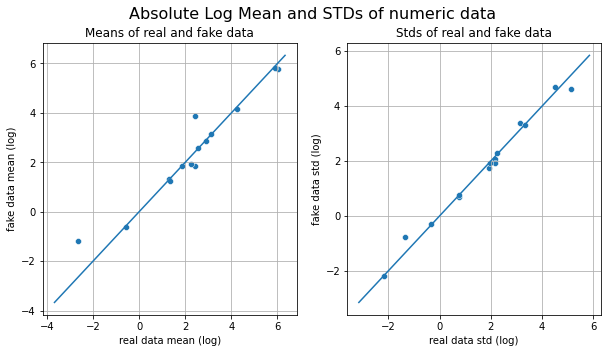

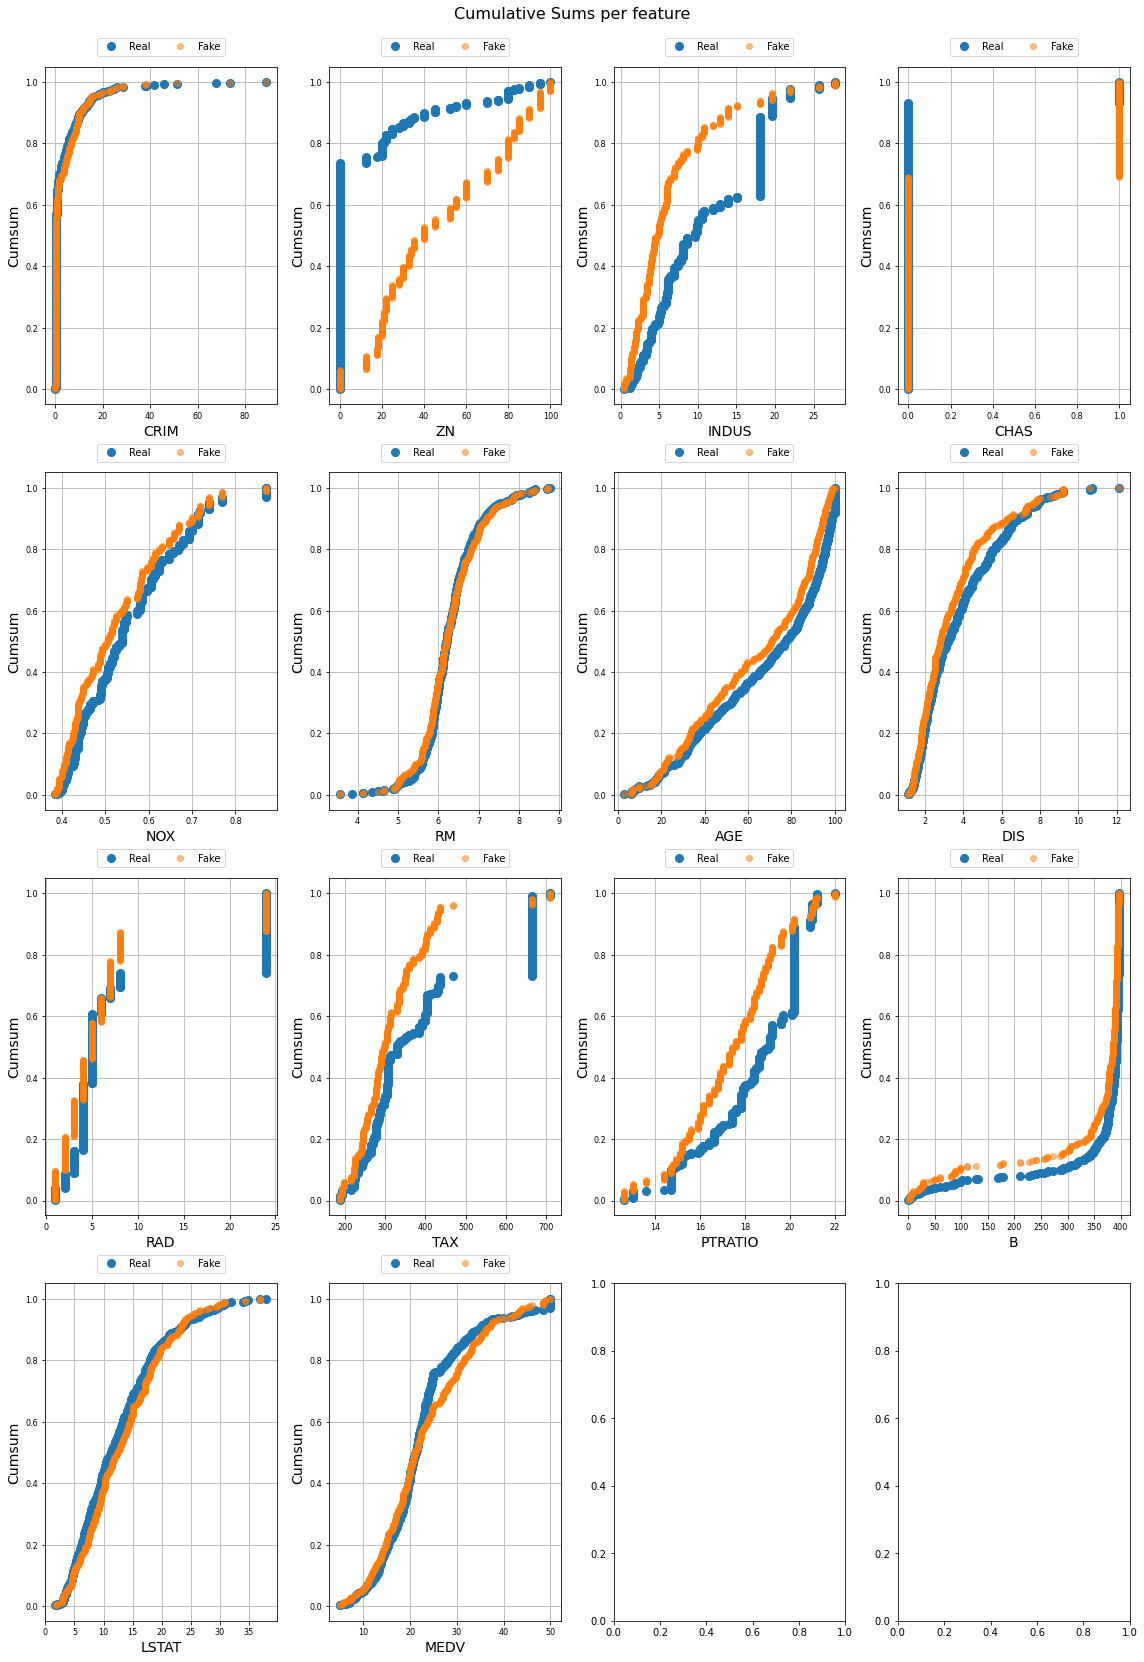

ValueError: cannot reindex from a duplicate axis

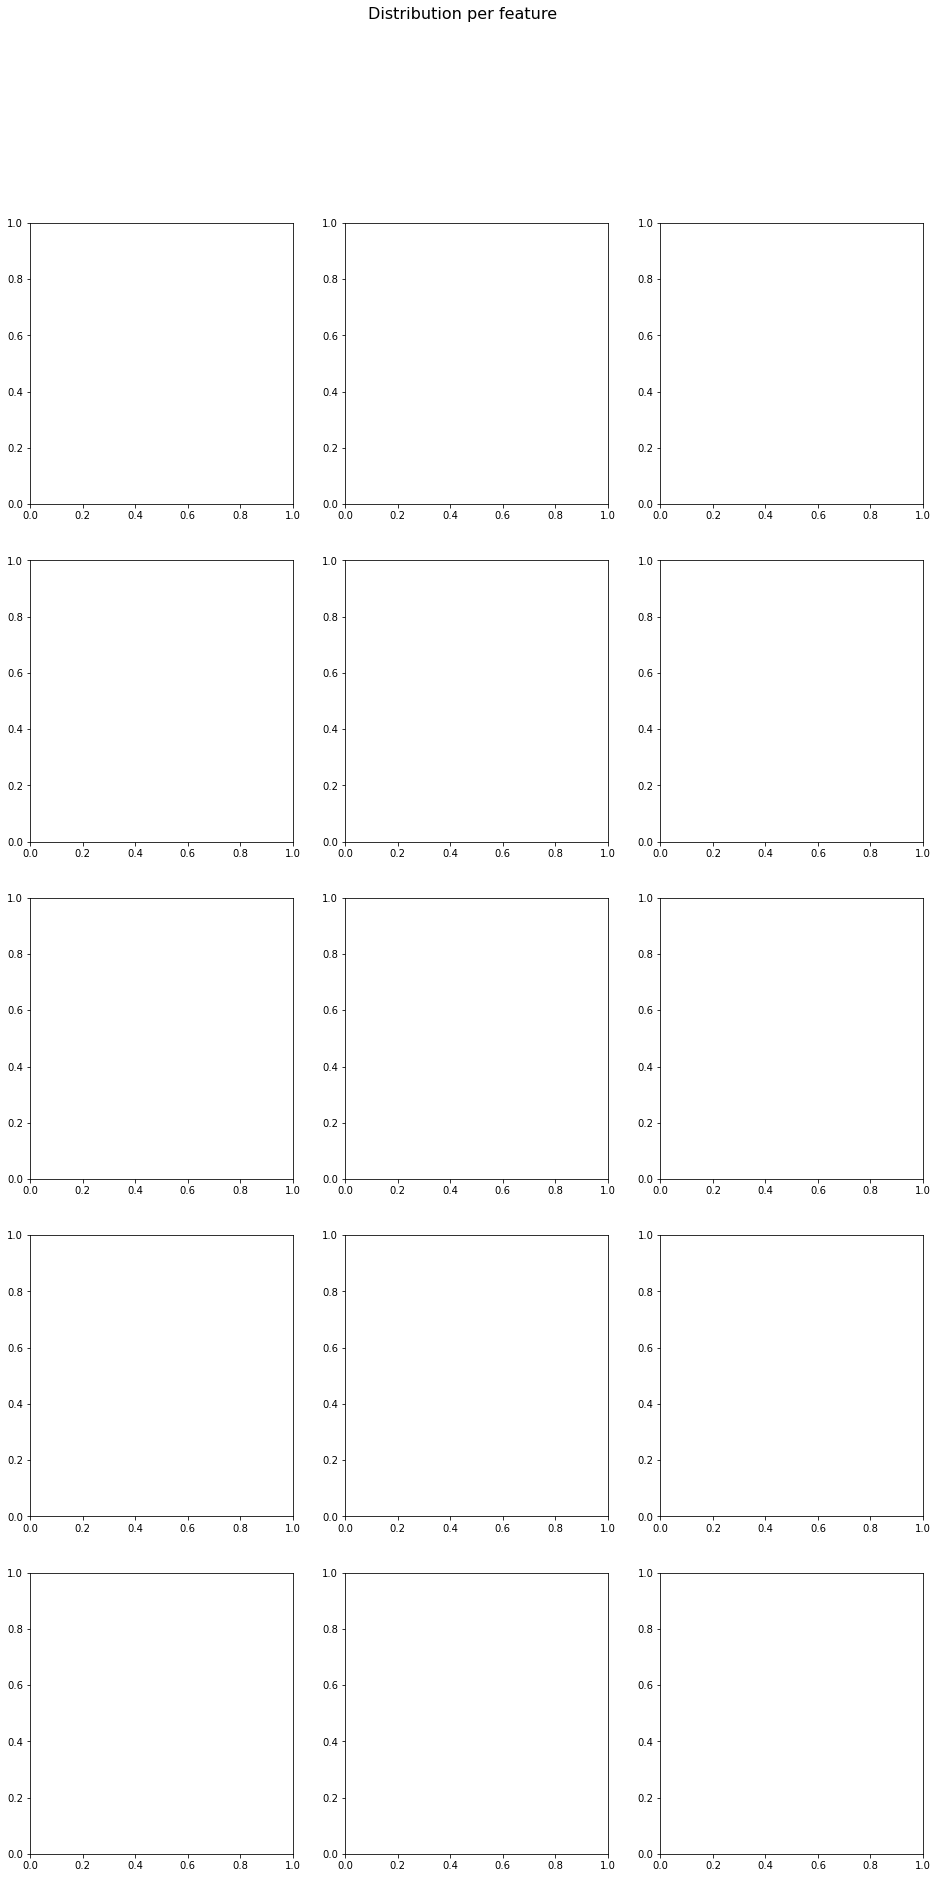

In [10]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(boston, samples)
table_evaluator.visual_evaluation()